# Análisis de desempeño operativo de servicios de Cajeros Automáticos 2020 -2024


## **FASE 1: Comprensión del negocio**

#### **Ficha tecnica**

Información General:

- Fuente de datos: fuente comercial y están sujetos a restricciones de confidencialidad

- Fecha de actualización: 30 de mayo de 2024
- Fecha de creación: 09-12-2020
- Filas:  162.424
- Columnas: 48

Información de la entidad:

- Área o dependencia: Financiera
- Departamento: Bogotá D.C.
- Municipio: Bogotá D.C.


#### **CALENDARIO DE ACTIVIDADES**

![Calendario de actividades](otros/calendario.jpg)

## **FASE 2: Comprensión de los datos**

#### **importando librerias**

In [4]:
# Librerias para tratamiento de datos
import pandas as pd
import numpy as np

# Librerias para visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias para entrenamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Se configura la forma en que los números flotantes se muestran al imprimir un DataFrame en pandas.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#formateo de columnas
pd.set_option('display.max_columns', None)

#### **Diccionario de los datos**

![Calendario de actividades](otros/Descripcion.jpg)

#### **Conexion y consulta de datos**

In [5]:
#!pip install openpyxl

In [6]:

# Leer el archivo excel ubicado en la ruta especificada y asigna los datos a la variable df_resultados
try:
 df_eventos_cajeros = pd.read_excel("C:/Users/bladi/OneDrive/Escritorio/BOOTCAMP_DATOS/Datos/Eventoscajeros.xlsx")
 print("El dataset se cargo exitosamente")
# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileNotFoundError as e:
# Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
  print("Archivo no encontrado error:", e)
except Exception as ex:
  print(f"Error inesperado detalle: {ex}")

El dataset se cargo exitosamente


In [7]:
df_eventos_cajeros.head(5)

,MINUTA_ID,Fecha Solicitud,Hora Solicitud,Dia Solicitud,Jornada Solicitud,Categoria Minuta,Punto ID,ATM,Marca ATM,Modelo ATM,ATM VIP,Nombre ATM,PUNTO_TIPO_UBICACION,PUNTO_CIUDADOP,Ciudad Operativa,PUNTO_LAT,PUNTO_LON,Fecha Asignación,Hora Asignación,Dia Asignación,Nombre Categoria,Subcategoria,Novedad,MINUTA_DESCRIP,Nombre Proveedor,TRAZABILIDAD,FECHA_ACCES,ESTADO_REQ,NOMBRE_ESTADO_REQ,HORA_RESOLV,Tiempo de Respuesta,Tiempo de Respuesta Tarde,Tiempo Respuesta Proveedor Tarde,TIEMPO_RESP_TOTAL,Hora Llegada a Sitio,Fecha Llegada a Sitio,Fecha Cierre Ticket,Hora Cierre Ticket,TIEMPO_RESOLV,HORAS_FRACCION,Tiempo Solución lvl 6,Tiempo Espera al Proveedor,TIEMPO_REQUERIDO_CLI,MINUTA_TICKETID,KTC,PUNTO_ESTADO,ESTREQ_DESCRIPCION,dia
0,36097,2020-12-09 14:56:53.813,14:56:53,VIERNES,Jornada tarde,FLM,1307,6111,DIEBOLD,WINCOR CS2060RL,VIP,GECOLSA BOGOTÁ,NV1,CBOGO,BOGOTA,4.63,-74.10,2020-12-09 14:56:53.813,14:56:53,MIERCOLES,Primera Linea,INACTIVIDAD,ATM INACTIVO,ATM INACTIVO,NaN,Recepción Operadora,2020-12-09 15:14:22.693,2.00,CIERRE DEL REQUERIMIENTO,15:19:04,NaN,102.00,NaN,102.00,15:11:36.730000,2020-12-09,2020-12-09 15:19:04.963,15:19:04,8.00,1.00,NaN,NaN,15.00,NaN,COMUNICACIONES,1.00,se realiza primera línea al ATM 6111 el teclad...,10.00
1,36099,2020-12-09 18:07:34.230,18:07:34,JUEVES,Jornada noche,SLM,933,7843,HYOSUNG,5600S,No VIP,C.C CARACAS,NV1,CBOGO,BOGOTA,4.63,-74.10,2020-12-09 18:07:34.230,18:07:34,MIERCOLES,Segunda Linea,CITA,REINSTALACION DE APLICATIVO,APLICATIVO,NaN,Recepción Operadora,2020-12-09 18:02:10.953,2.00,CIERRE DEL REQUERIMIENTO,18:09:49,NaN,118.00,117.00,118.00,18:07:50.703000,2020-12-09,2020-12-09 18:09:49.120,18:09:49,2.00,1.00,NaN,1.00,0.00,NaN,COMUNICACIONES,1.00,sin falla,9.00
2,36101,2020-12-09 19:15:23.930,19:15:23,VIERNES,Jornada tarde,SLM,1046,1,DIEBOLD,OPTEVA 828,VIP,MULTISERV MERCURIO BOGOTA,NV6,CBOGO,BOGOTA,4.59,-74.20,2020-12-09 19:15:23.930,19:15:23,MIERCOLES,Segunda Linea,CITA,ILUMINACION,ACOMPAÑAMIENTO A PROVEEDOR DE ILUMINACIONES,NaN,Recepción Operadora,2020-12-11 13:24:02.237,2.00,CIERRE DEL REQUERIMIENTO,13:29:36,NaN,158.00,158.00,158.00,13:22:16.533000,2020-12-11,2020-12-11 13:29:36.973,13:29:36,7.00,1.00,NaN,NaN,353.00,NaN,COMUNICACIONES,1.00,prueba de aplicativo,10.00
3,36103,2020-12-10 17:30:25.250,17:30:25,SABADO,Jornada noche,FLM,756,1100,NCR,SELFSERV S23,VIP,FACATATIVA,NV6,CBOGO,BOGOTA,4.81,-74.35,2020-12-10 17:30:25.250,17:30:25,JUEVES,Primera Linea,COMUNICACIONES,NO REPORTA KTC,no reporta ktc,NaN,Recepción Operadora,2020-12-10 17:55:08.450,2.00,CIERRE DEL REQUERIMIENTO,18:55:37,NaN,126.00,NaN,126.00,17:54:40.387000,2020-12-10,2020-12-10 18:55:37.720,18:55:37,61.00,2.00,NaN,NaN,24.00,NaN,KTC,1.00,ATM 1100 Facatativá finaliza servicio de prue...,11.00
4,36104,2020-12-10 17:36:10.090,17:36:10,VIERNES,Jornada noche,SLM,767,1604,NCR,SELFSERV S23,VIP,CORABASTOS BOGOTA,NV6,CBOGO,BOGOTA,4.63,-74.16,2020-12-10 17:36:10.090,17:36:10,JUEVES,Segunda Linea,CITA,UPS,cambio ups,NaN,Recepción Operadora,2020-12-10 19:39:33.250,5.00,CAJERO SIN NOVEDAD,19:44:47,NaN,57.00,56.00,57.00,19:36:04.643000,2020-12-10,2020-12-10 19:44:47.890,19:44:47,8.00,1.00,NaN,1.00,120.00,NaN,COMUNICACIONES,1.00,Se finaliza servicio ATM 1604 se realiza aco...,10.00


In [8]:
# Consulta y validación de la cantidad de filas y columnas del dataframe
num_row, num_col = df_eventos_cajeros.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'El DataFrame, tiene {num_row} filas {num_col} columns.')

El DataFrame, tiene 162424 filas 48 columns.


In [9]:
pd.DataFrame(df_eventos_cajeros.columns, columns= ['Columnas'])

,Columnas
0,MINUTA_ID
1,Fecha Solicitud
2,Hora Solicitud
3,Dia Solicitud
4,Jornada Solicitud
5,Categoria Minuta
6,Punto ID
7,ATM
8,Marca ATM
9,Modelo ATM


In [10]:
df_eventos_cajeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162424 entries, 0 to 162423
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   MINUTA_ID                         162424 non-null  int64         
 1   Fecha Solicitud                   162424 non-null  datetime64[ns]
 2   Hora Solicitud                    162424 non-null  object        
 3   Dia Solicitud                     162424 non-null  object        
 4   Jornada Solicitud                 162387 non-null  object        
 5   Categoria Minuta                  162424 non-null  object        
 6   Punto ID                          162424 non-null  int64         
 7   ATM                               162424 non-null  int64         
 8   Marca ATM                         162424 non-null  object        
 9   Modelo ATM                        162424 non-null  object        
 10   ATM VIP                        

In [11]:
# Análisis de valores faltantes por columna
datos_faltes = df_eventos_cajeros.isnull().sum()
porcentajes_faltantes = (df_eventos_cajeros.isnull().sum()/len(df_eventos_cajeros))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df

,Valores faltes,Porcentaje (%)
Tiempo Solución lvl 6,142159,87.52
Tiempo Respuesta Proveedor Tarde,133032,81.90
Nombre Proveedor,97933,60.29
Tiempo de Respuesta,91359,56.25
Tiempo Espera al Proveedor,83334,51.31
Tiempo de Respuesta Tarde,72036,44.35
PUNTO_LAT,5896,3.63
PUNTO_LON,5813,3.58
MINUTA_TICKETID,2339,1.44
ESTREQ_DESCRIPCION,1208,0.74


In [12]:
df_eventos_cajeros.describe()

,MINUTA_ID,Fecha Solicitud,Punto ID,ATM,PUNTO_LAT,PUNTO_LON,Fecha Asignación,FECHA_ACCES,ESTADO_REQ,Tiempo de Respuesta,Tiempo de Respuesta Tarde,Tiempo Respuesta Proveedor Tarde,TIEMPO_RESP_TOTAL,Fecha Llegada a Sitio,Fecha Cierre Ticket,TIEMPO_RESOLV,HORAS_FRACCION,Tiempo Solución lvl 6,Tiempo Espera al Proveedor,TIEMPO_REQUERIDO_CLI,PUNTO_ESTADO,dia
count,162424.00,162424,162424.00,162424.00,156528.00,156611.00,162424,161384,162420.00,71065.00,90388.00,29392.00,161453.00,161490,162420,161490.00,162420.00,20265.00,79090.00,161490.00,162420.00,162419.00
mean,136408.12,2022-11-10 11:32:04.881714432,1086.61,4353.80,5.83,-74.47,2022-11-10 13:43:38.017263104,2022-11-09 03:31:32.974092800,2.43,87.21,39.13,45.27,60.29,2022-11-08 17:43:42.255248128,2022-11-11 05:04:25.890802944,92.94,2.07,139.46,23.91,335.70,0.96,15.81
min,36097.00,2020-12-09 14:56:53.813000,1.00,1.00,0.00,-81.70,2020-12-09 14:56:53.813000,2020-12-09 15:14:22.693000,0.00,0.00,1.00,1.00,0.00,2020-12-09 00:00:00,2020-12-09 15:19:04.963000,-1426.00,0.00,1.00,1.00,0.00,0.00,1.00
25%,90211.75,2022-01-31 11:01:59.685250048,530.75,1858.00,4.62,-75.50,2022-01-31 11:01:59.685250048,2022-01-30 07:52:44.302500096,2.00,10.00,10.00,6.00,10.00,2022-01-30 00:00:00,2022-01-31 21:27:15.255250176,33.00,1.00,71.00,2.00,103.00,1.00,8.00
50%,134273.50,2022-12-06 14:07:50.843000064,1058.00,3528.00,4.70,-74.13,2022-12-06 17:20:22.297999872,2022-12-04 10:56:20.828499968,2.00,37.00,21.00,17.00,25.00,2022-12-04 00:00:00,2022-12-07 10:19:19.191500032,64.00,2.00,120.00,12.00,277.00,1.00,16.00
75%,189100.25,2023-08-30 19:13:08.650249984,1550.00,7071.00,6.23,-74.08,2023-08-30 21:27:58.359250176,2023-08-28 14:02:40.095749888,2.00,118.00,44.00,49.00,66.00,2023-08-28 00:00:00,2023-08-31 11:05:58.485999872,120.00,2.00,186.00,32.00,546.00,1.00,23.00
max,233397.00,2024-05-29 14:19:02.927000,2475.00,9923.00,12.59,76.51,2024-05-29 14:19:02.927000,2024-05-29 14:51:56.617000,5.00,1420.00,1363.00,1259.00,1420.00,2024-05-29 00:00:00,2024-05-29 15:28:15.390000,864.00,13.00,824.00,820.00,1386.00,1.00,31.00
std,55643.01,NaN,646.10,2730.46,2.42,3.64,NaN,NaN,0.96,118.10,59.87,76.95,93.36,NaN,NaN,100.80,1.60,94.46,38.89,262.11,0.19,8.81


#### <span style='color: #21B8E5'> Observaciones </span>

- Se identifico en la columna<u> Tiempo Solución lvl 6</u> un porcentaje de 87% de valores faltantes
- Se identifico en la columna<u> Tiempo Respuesta Proveedor Tarde</u> un porcentaje de 82% de valores faltantes
- Se identifico en la columna<u> Nombre del proveedor</u> un porcentaje de 60% de valores faltantes
- Se identifico en la columna<u> Tiempo de Respuesta</u> un porcentaje de 56% de valores faltantes
- Se identifico en la columna<u> Tiempo Espera al Proveedor</u> un porcentaje de 51% de valores faltantes
- Se identifico en la columna<u> Tiempo de Respuesta Tarde</u> un porcentaje de 44% de valores faltantes
 </br></br>
 estos hallazgos revelan una falta significativa de datos en esta variable lo que puede afectar la capacidad de analizar y comprender ciertos aspectos

 - Se identifico en la columa <u>TIEMPO_RESOLV</u> un valor minimo negativo de -1426

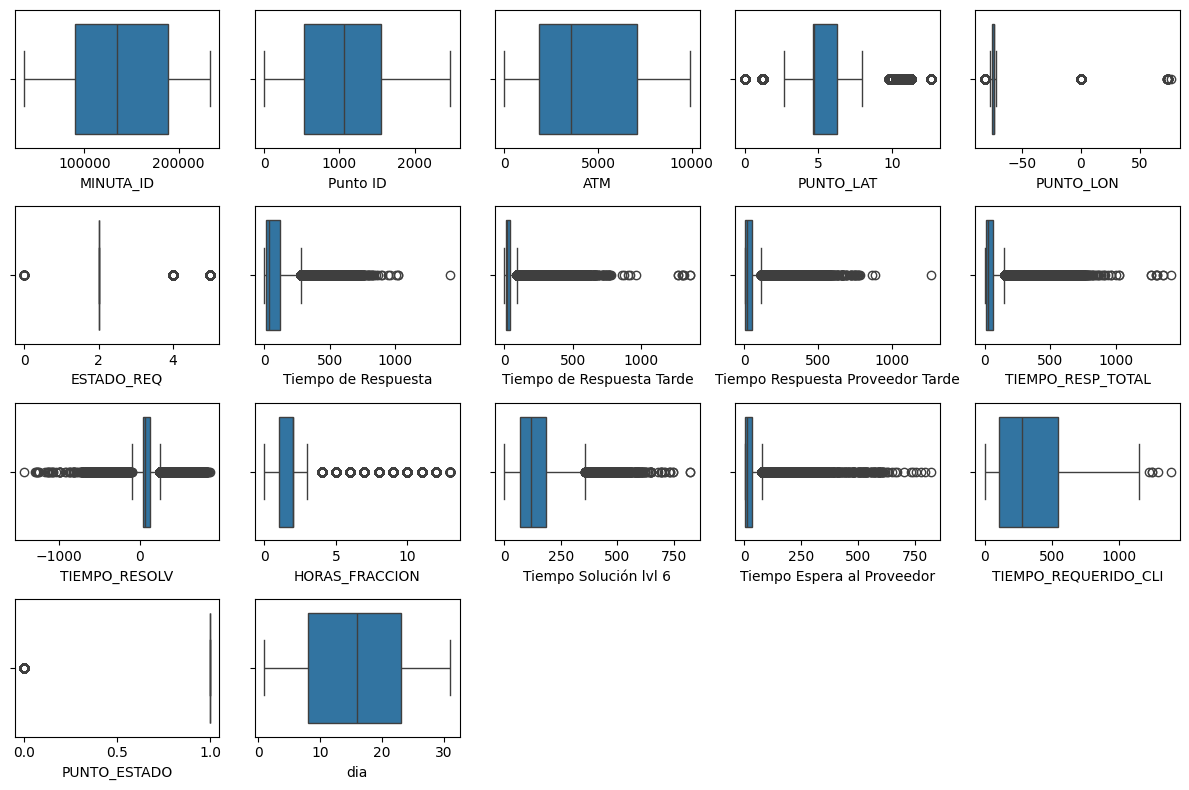

In [13]:
# Identificar valores atípicos en las variables numéricas
numeric_cols = df_eventos_cajeros.select_dtypes(include=['float','int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data = df_eventos_cajeros, x = col)

plt.tight_layout()
plt.show()

## **FASE 3: Preparación de datos**

In [14]:
##Cambiando todas las columnas en mayusculas y reemplazando valores vacios de las columnas
for columna in df_eventos_cajeros.columns:
    df_eventos_cajeros.rename(columns={columna: columna.upper().replace(' ', '_')}, inplace=True)

In [15]:
#pd.DataFrame(df_eventos_cajeros.columns, columns= ['Columnas'])

In [16]:
# Renombrando algunas columas para mejor entendimiento y legibilidad
df_eventos_cajeros.rename(columns= {'_ATM_VIP': 'ATM_VIP',
                                    'PUNTO_CIUDADOP': 'PUNTO_CIUDAD_OP',
                                    'FECHA_ASIGNACIÓN': 'FECHA_ASIGNACION',
                                    'HORA_ASIGNACIÓN': 'HORA_ASIGNACION',
                                    'DIA_ASIGNACIÓN': 'DIA_ASIGNACION',
                                    'FECHA_ACCES': 'FECHA_ACCESO',
                                    'MINUTA_TICKETID': 'MINUTA_TICKET_ID'}, inplace= True)

pd.DataFrame(df_eventos_cajeros.columns, columns= ['Columnas'])

,Columnas
0,MINUTA_ID
1,FECHA_SOLICITUD
2,HORA_SOLICITUD
3,DIA_SOLICITUD
4,JORNADA_SOLICITUD
5,CATEGORIA_MINUTA
6,PUNTO_ID
7,ATM
8,MARCA_ATM
9,MODELO_ATM


#### columna TIEMPO_RESOLV

In [17]:
df_eventos_cajeros['TIEMPO_RESOLV'] = pd.to_numeric(df_eventos_cajeros['TIEMPO_RESOLV'], errors='coerce')
df_eventos_cajeros['TIEMPO_RESOLV'].info()



<class 'pandas.core.series.Series'>
RangeIndex: 162424 entries, 0 to 162423
Series name: TIEMPO_RESOLV
Non-Null Count   Dtype  
--------------   -----  
161490 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [18]:
num_valores_negativos = (df_eventos_cajeros['TIEMPO_RESOLV'] < 0).sum()
total_de_filas = df_eventos_cajeros.shape[0]
print(f'Número de valores negativos: {num_valores_negativos} \n Número total de filas: {total_de_filas}')

Número de valores negativos: 527 
 Número total de filas: 162424


In [19]:
# Reemplazar los valores negativos por cero en 'TIEMPO_RESOLV'
df_eventos_cajeros.loc[df_eventos_cajeros['TIEMPO_RESOLV'] < 0, 'TIEMPO_RESOLV'] = 0

In [20]:
# Porcentaje de valores negativos
porcentaje_negativos = (num_valores_negativos / df_eventos_cajeros.shape[0]) * 100
porcentaje_positivos = 100 - porcentaje_negativos
print(f'Porcentaje de valores negativos: {porcentaje_negativos:.2f}%')


Porcentaje de valores negativos: 0.32%


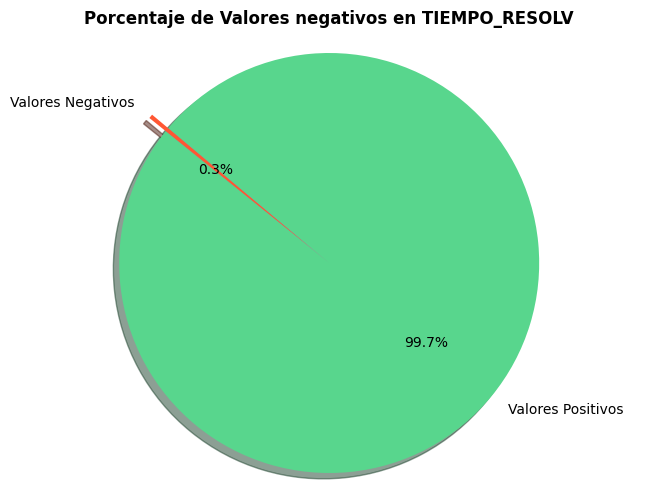

In [21]:
sizes = [porcentaje_negativos, porcentaje_positivos]
labels = ['Valores Negativos', 'Valores Positivos']
colors = ['#FF5733', '#58D68D']
explode = (0, 0.1)
# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Porcentaje de Valores negativos en TIEMPO_RESOLV', fontdict={'fontweight': 'bold'})
plt.axis('equal')

# Mostrar el gráfico
plt.show()

In [22]:
df_eventos_cajeros['TIEMPO_RESOLV'].describe()

count   161490.00
mean        94.17
std         96.01
min          0.00
25%         33.00
50%         64.00
75%        120.00
max        864.00
Name: TIEMPO_RESOLV, dtype: float64

#### columna TIEMPO_SOLUCIÓN_LVL_6

In [23]:
# Calcular el número de valores vacíos en la columna TIEMPO_SOLUCIÓN_LVL_6
valores_vacios = df_eventos_cajeros['TIEMPO_SOLUCIÓN_LVL_6'].isnull().sum()
total_filas = df_eventos_cajeros['TIEMPO_SOLUCIÓN_LVL_6'].shape[0]

# Calcular el porcentaje de valores vacíos
porcentaje_vacios = (valores_vacios / total_filas) * 100
porcentaje_validos = 100 - porcentaje_vacios

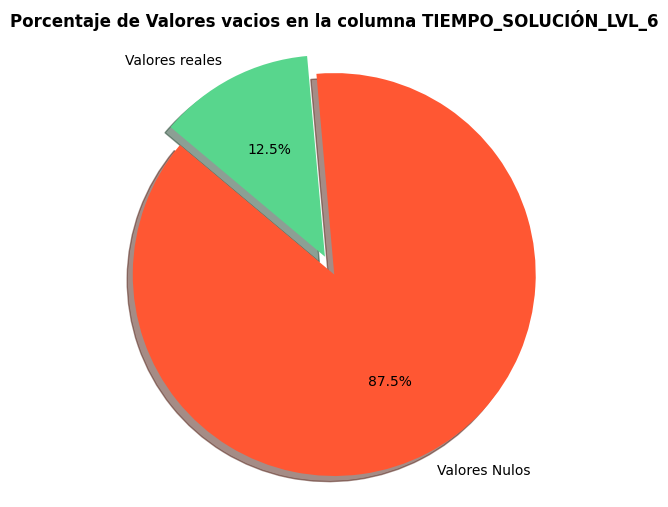

In [24]:
sizes = [porcentaje_vacios, porcentaje_validos]
labels = ['Valores Nulos', 'Valores reales']
colors = ['#FF5733', '#58D68D']
explode = (0, 0.1)
# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Porcentaje de Valores vacios en la columna TIEMPO_SOLUCIÓN_LVL_6', fontdict={'fontweight': 'bold'})
plt.axis('equal')

# Mostrar el gráfico
plt.show()

Se encontró que el 87% de los registros en esta columna están vacíos o tienen valores nulos. Este alto porcentaje de datos faltantes puede deberse a diversas razones, como problemas en la recopilación de datos o falta de registro.
Además de los valores vacíos, se observó que los datos existentes en esta columna no corresponden a los valores esperados o reales,Parece que los datos presentes en esta columna viene de la columna <u>TIEMPO_RESOLV</u> lo cual no deberia ser asi.
-   Dado que más del 80% de los valores en esta columna son nulos y los datos existentes no son representativos de los tiempos reales de solución, se tomó la decisión de eliminar esta columna del conjunto de datos

Eliminar la columna <u>'TIEMPO_SOLUCIÓN_LVL_6'</u> del DataFrame

In [25]:
df_eventos_cajeros.drop('TIEMPO_SOLUCIÓN_LVL_6', axis=1, inplace= True)

#### **Tratamiento de datos faltantes**

In [26]:
# Análisis de valores faltantes por columna
datos_faltantes = df_eventos_cajeros.isnull().sum()
porcentajes_faltantes = (df_eventos_cajeros.isnull().sum()/len(df_eventos_cajeros))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltantes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df.head(30)

,Valores faltes,Porcentaje (%)
TIEMPO_RESPUESTA_PROVEEDOR_TARDE,133032,81.90
NOMBRE_PROVEEDOR,97933,60.29
TIEMPO_DE_RESPUESTA,91359,56.25
TIEMPO_ESPERA_AL_PROVEEDOR,83334,51.31
TIEMPO_DE_RESPUESTA_TARDE,72036,44.35
PUNTO_LAT,5896,3.63
PUNTO_LON,5813,3.58
MINUTA_TICKET_ID,2339,1.44
ESTREQ_DESCRIPCION,1208,0.74
FECHA_ACCESO,1040,0.64


In [27]:
df_eventos_cajeros.fillna({'TIEMPO_RESPUESTA_PROVEEDOR_TARDE': 0,
                           'TIEMPO_DE_RESPUESTA': 0,
                           'TIEMPO_DE_RESPUESTA_TARDE': 0,
                           'PUNTO_LAT': 0,
                           'PUNTO_LON': 0,
                           'TIEMPO_ESPERA_AL_PROVEEDOR': 0,
                           'MINUTA_TICKET_ID':0,
                           'TIEMPO_RESP_TOTAL': 0,
                           'TIEMPO_REQUERIDO_CLI': 0,
                           'DIA': 0,
                           'HORAS_FRACCION': 0,
                           'ESTADO_REQ': 0,
                           'PUNTO_ESTADO': 0,
                           'ESTREQ_DESCRIPCION': '.',
                           'NOMBRE_PROVEEDOR': 'NULL',
                           'FECHA_ACCESO': 'NULL',
                           'TIEMPO_RESOLV': 'NULL',
                           'HORA_LLEGADA_A_SITIO': 'NULL',
                           'FECHA_LLEGADA_A_SITIO': 'NULL',
                           'PUNTO_TIPO_UBICACION': 'NULL',
                           'NOMBRE_ESTADO_REQ': 'NULL',
                           'JORNADA_SOLICITUD': 'NULL',
                           'FECHA_CIERRE_TICKET': 'NULL',
                           'HORA_CIERRE_TICKET': 'NULL',
                           'MINUTA_DESCRIP': 'NULL',
                           'DIA': 'NULL',
                           'HORA_RESOLV': 'NULL',
                           'TRAZABILIDAD': 'NULL',
                           'KTC': 'NULL',
                           'PUNTO_CIUDAD_OP': 'NULL',
                           'CIUDAD_OPERATIVA': 'NULL'
                           },inplace= True)


 se procedió a reemplazar estos valores vacíos con un valor específico. Este proceso garantizó que todas las columnas contengan datos válidos y facilitó el análisis posterior al eliminar posibles discrepancias o inconsistencias debidas a valores vacíos.

In [28]:
# Análisis de valores faltantes por columna
datos_faltes = df_eventos_cajeros.isnull().sum()
porcentajes_faltantes = (df_eventos_cajeros.isnull().sum()/len(df_eventos_cajeros))*100

faltantes_df = pd.DataFrame({
    'Valores faltes' : datos_faltes,
    'Porcentaje (%)': porcentajes_faltantes            
})

# Ordenar de manera descendente por porcentaje de valores faltantes
faltantes_df = faltantes_df.sort_values(by = 'Porcentaje (%)', ascending=False)
faltantes_df.head(10)

,Valores faltes,Porcentaje (%)
MINUTA_ID,0,0.00
FECHA_LLEGADA_A_SITIO,0,0.00
FECHA_ACCESO,0,0.00
ESTADO_REQ,0,0.00
NOMBRE_ESTADO_REQ,0,0.00
HORA_RESOLV,0,0.00
TIEMPO_DE_RESPUESTA,0,0.00
TIEMPO_DE_RESPUESTA_TARDE,0,0.00
TIEMPO_RESPUESTA_PROVEEDOR_TARDE,0,0.00
TIEMPO_RESP_TOTAL,0,0.00


In [29]:
df_eventos_cajeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162424 entries, 0 to 162423
Data columns (total 47 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   MINUTA_ID                         162424 non-null  int64         
 1   FECHA_SOLICITUD                   162424 non-null  datetime64[ns]
 2   HORA_SOLICITUD                    162424 non-null  object        
 3   DIA_SOLICITUD                     162424 non-null  object        
 4   JORNADA_SOLICITUD                 162424 non-null  object        
 5   CATEGORIA_MINUTA                  162424 non-null  object        
 6   PUNTO_ID                          162424 non-null  int64         
 7   ATM                               162424 non-null  int64         
 8   MARCA_ATM                         162424 non-null  object        
 9   MODELO_ATM                        162424 non-null  object        
 10  ATM_VIP                         

**SOLICITUDES POR AÑO**

In [30]:
import datetime
df_eventos_cajeros.FECHA_SOLICITUD.value_counts()

FECHA_SOLICITUD
2023-08-14 19:24:45.720    15
2022-10-01 13:04:55.333     9
2023-07-14 09:50:36.137     5
2021-08-12 13:17:04.383     5
2021-08-08 13:55:32.100     5
                           ..
2022-05-11 17:20:16.767     1
2022-05-11 17:34:21.070     1
2022-05-11 18:01:26.700     1
2022-05-11 18:02:14.363     1
2024-05-29 14:19:02.927     1
Name: count, Length: 161734, dtype: int64

Se crea una nueva columa llamada <u>ANHO</u> que sera asignado solo los años de las solicitudes para una mejor legibilidad y manipulación con la libreria datetime

In [31]:
df_eventos_cajeros['ANHO'] = df_eventos_cajeros['FECHA_SOLICITUD'].dt.year

In [32]:
años_operaciones = df_eventos_cajeros['ANHO'].value_counts()
años_operaciones.sort_index()


ANHO
2020     1282
2021    35915
2022    47856
2023    55443
2024    21928
Name: count, dtype: int64

Creando un grafico de linea

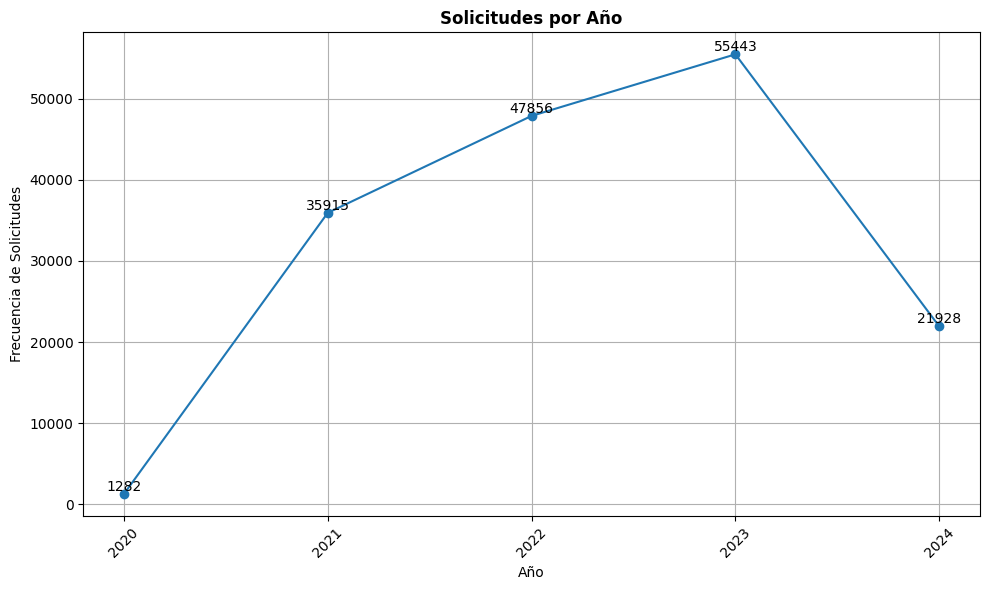

In [33]:
años_operaciones = df_eventos_cajeros['ANHO'].value_counts()
años_operaciones = años_operaciones.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(años_operaciones.index, años_operaciones.values, marker='o', linestyle='-')
plt.title('Solicitudes por Año', fontdict={'fontweight': 'bold'})
plt.xlabel('Año')
plt.ylabel('Frecuencia de Solicitudes')
plt.grid(True)
plt.xticks(años_operaciones.index, rotation=45)

# Agregar etiquetas de valor a cada punto
for i, valor in enumerate(años_operaciones.values):
    plt.text(años_operaciones.index[i], valor, str(valor), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

Se puede notar que el año 2020 cuenta con pocas operaciones debido a que se inicio operaciones en el mes de diciembre ya despues de ese año continuo con un crecimiento positivo de las solicitudes y descendio en el año 2024 debido a que la ultima actualizacion de datos fue en mayo de este año.

**CIUDADES CON MAS OPERACIONES**

In [34]:
#ciudades con mas operaciones:
frecuencia_ciudades = df_eventos_cajeros.CIUDAD_OPERATIVA.value_counts()
frecuencia_ciudades

CIUDAD_OPERATIVA
BOGOTA           78831
MEDELLIN         14639
BARRANQUILLA     12416
CALI             11349
CARTAGENA         7483
SANTA MARTA       4881
PEREIRA           4611
BUCARAMANGA       4185
MANIZALEZ         3618
CUCUTA            3476
VILLAVICENCIO     2777
TUNJA             2569
IBAGUE            2422
ARMENIA           2385
VALLEDUPAR        1693
NEIVA             1599
PASTO             1450
SAN ANDRES        1203
MONTERIA           767
LORICA              69
NULL                 1
Name: count, dtype: int64

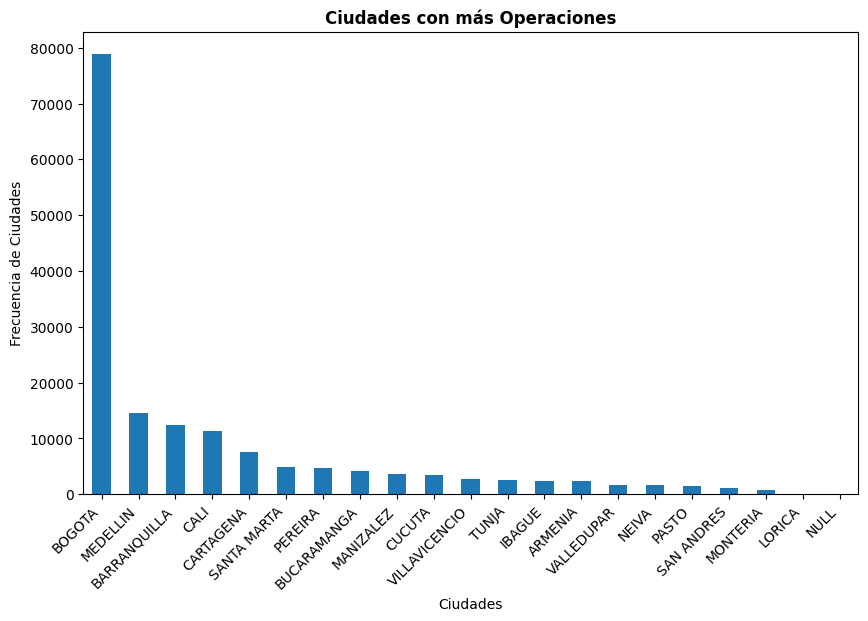

In [35]:
plt.figure(figsize=(10,6))
frecuencia_ciudades.plot(kind='bar')
plt.xlabel('Ciudades')
plt.ylabel('Frecuencia de Ciudades')
plt.title('Ciudades con más Operaciones', fontdict={'fontweight': 'bold'})
plt.xticks(rotation=45, ha='right')
plt.show()

#### Columna NOMBRE_CATEGORIA

In [36]:
df_eventos_cajeros['NOMBRE_CATEGORIA'].value_counts(ascending= True)

NOMBRE_CATEGORIA
Primera Linea    72305
Segunda Linea    90119
Name: count, dtype: int64

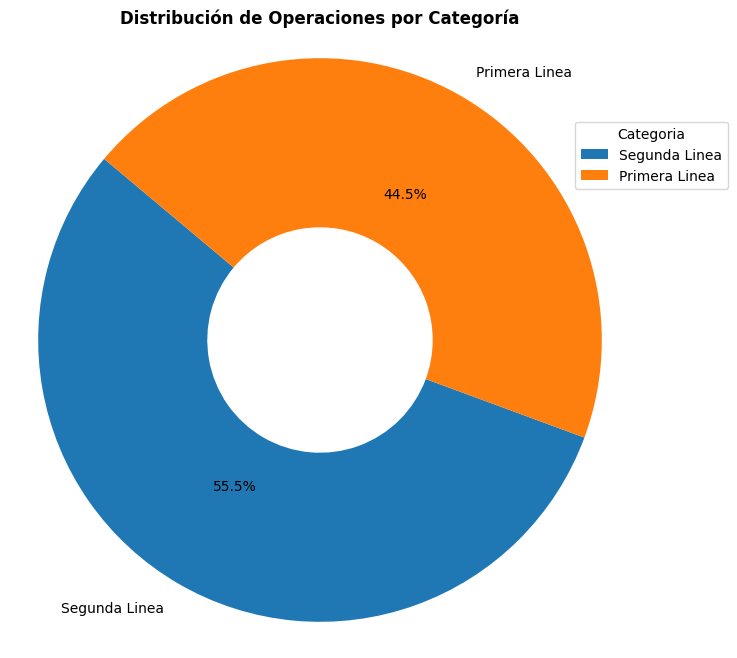

In [37]:
# Datos
categorias = df_eventos_cajeros['NOMBRE_CATEGORIA'].value_counts().index.tolist()
operaciones = df_eventos_cajeros['NOMBRE_CATEGORIA'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(operaciones, labels=categorias, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.6})
plt.title('Distribución de Operaciones por Categoría', fontdict={'fontweight': 'bold'})
plt.axis('equal')
plt.legend(title='Categoria', loc='center left', bbox_to_anchor=(.9, .8))
plt.show()

#### Columna SUBCATEGORIA

In [38]:
df_subcategorias = df_eventos_cajeros['SUBCATEGORIA'].value_counts(ascending= False)
df_subcategorias

SUBCATEGORIA
CITA                         72370
COMUNICACIONES               24047
NIVEL 6                      17572
LECTORA                      14084
SOLICITUD ESPECIAL           13519
IMPRESORA                     8478
ACTIVACION DE SENSORES        5760
INACTIVIDAD                   4425
REMODELACIONES                1743
ENTREGA DE LLAVES              241
SHUTTER                        112
PUERTAS ABIERTAS                60
TECLADO                          9
MEDIDAS CAMBIO DE MAQUINA        4
Name: count, dtype: int64

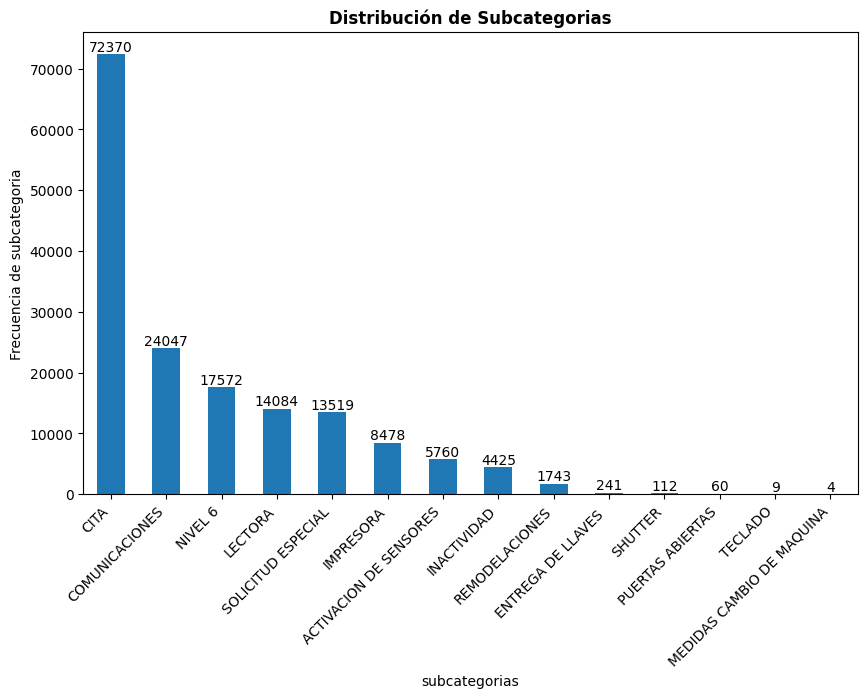

In [39]:
plt.figure(figsize=(10,6))
ax = df_subcategorias.plot(kind='bar')

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f}'.format(y)  # Formatear el valor sin decimales
    ax.text(x, y, label, ha='center', va='bottom')

plt.xlabel('subcategorias')
plt.ylabel('Frecuencia de subcategoria')
plt.title('Distribución de Subcategorias', fontdict={'fontweight': 'bold'})
plt.xticks(rotation=45, ha='right')
plt.show()


##### Distribución de subcategoria por año

In [40]:
conteo_por_año_subcategoria = df_eventos_cajeros.groupby(['ANHO', 'SUBCATEGORIA']).size().unstack(fill_value= 0)
conteo_por_año_subcategoria

SUBCATEGORIA,ACTIVACION DE SENSORES,CITA,COMUNICACIONES,ENTREGA DE LLAVES,IMPRESORA,INACTIVIDAD,LECTORA,MEDIDAS CAMBIO DE MAQUINA,NIVEL 6,PUERTAS ABIERTAS,REMODELACIONES,SHUTTER,SOLICITUD ESPECIAL,TECLADO
ANHO,,,,,,,,,,,,,,
2020,67,553,255,6,137,89,45,2,0,4,52,15,57,0
2021,1348,19444,6638,164,2173,1298,2575,2,0,12,1205,55,1001,0
2022,1779,20926,7901,5,2688,1538,4559,0,6268,4,408,20,1760,0
2023,1814,22152,7104,64,2532,1115,6465,0,8157,12,48,16,5956,8
2024,752,9295,2149,2,948,385,440,0,3147,28,30,6,4745,1


<Figure size 1600x1200 with 0 Axes>

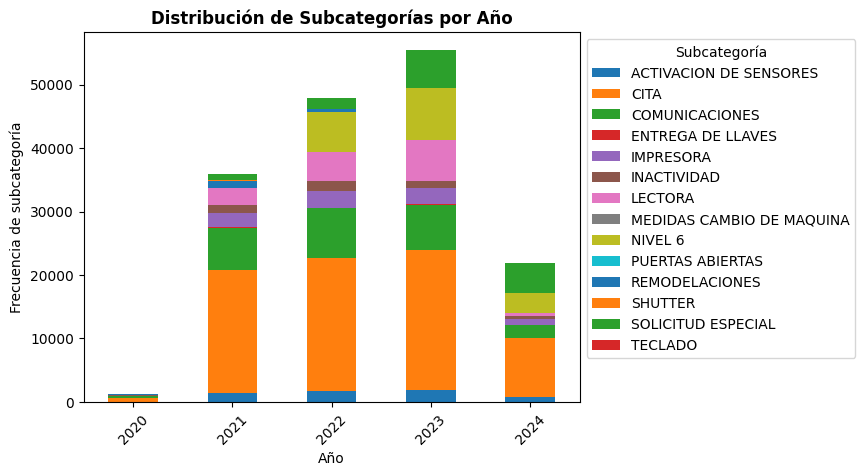

In [41]:
conteo_por_año_subcategoria = df_eventos_cajeros.groupby(['ANHO', 'SUBCATEGORIA']).size().unstack()

# Crear la gráfica
plt.figure(figsize=(16, 12))
conteo_por_año_subcategoria.plot(kind='bar', stacked=True) # indica apilamiento de barras una ensima de otra

# Añadir etiquetas y título 
plt.xlabel('Año')
plt.ylabel('Frecuencia de subcategoría')
plt.title('Distribución de Subcategorías por Año', fontdict={'fontweight': 'bold'})
plt.xticks(rotation=45)
plt.legend(title='Subcategoría', loc='center left', bbox_to_anchor=(1, 0.55))

# Mostrar la gráfica
plt.show()

#### Columna NOVEDAD

In [42]:
frecuencia_abs = df_eventos_cajeros['NOVEDAD'].value_counts()
frecuencia_relativa = df_eventos_cajeros['NOVEDAD'].value_counts(normalize=True) * 100
df_novedades = pd.DataFrame({'Valor': frecuencia_abs.index, 'Frecuencia Absoluta': frecuencia_abs.values, 'Porcentaje %': frecuencia_relativa.values})
df_novedades


,Valor,Frecuencia Absoluta,Porcentaje %
0,CERTIFICACION DE ATM,17659,10.87
1,NO REPORTA KTC,17340,10.68
2,PROVISION NIVEL 6,13942,8.58
3,VERIFICACION DE ATM,12988,8.00
4,FALLA EN LECTORA,8642,5.32
5,INFRAESTRUCTURA,7865,4.84
6,ALARMAS,7616,4.69
7,VANDALISMO EN LECTORA,7173,4.42
8,PAPEL BAJO,7064,4.35
9,FALLA EN LA LECTORA,6932,4.27


#### Columna TIEMPO_RESP_TOTAL

In [43]:
df_tiempo_respuesta_total = df_eventos_cajeros['TIEMPO_RESP_TOTAL']
df_tiempo_respuesta_total.describe()

count   162424.00
mean        59.93
std         93.19
min          0.00
25%          9.00
50%         25.00
75%         66.00
max       1420.00
Name: TIEMPO_RESP_TOTAL, dtype: float64

C:\Users\bladi\AppData\Local\Temp\ipykernel_8684\841391024.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_eventos_cajeros['TIEMPO_RESP_TOTAL'], shade=True, color='skyblue')


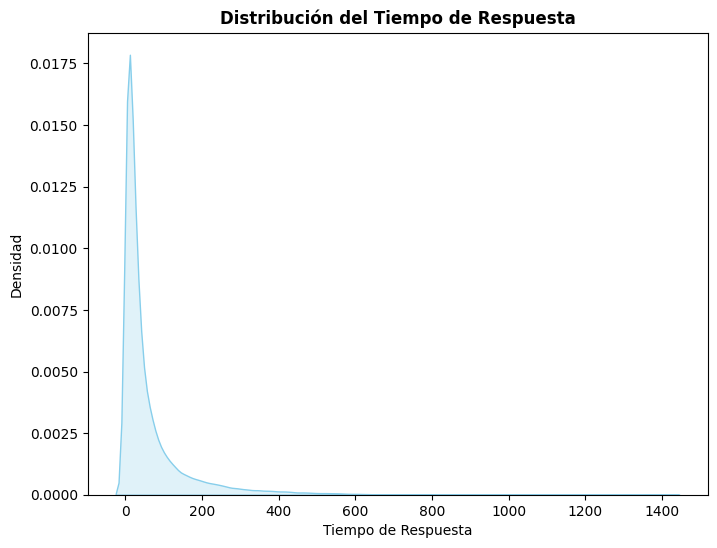

In [44]:
# Crear gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(df_eventos_cajeros['TIEMPO_RESP_TOTAL'], shade=True, color='skyblue')
plt.title('Distribución del Tiempo de Respuesta', fontdict={'fontweight': 'bold'})
plt.xlabel('Tiempo de Respuesta')
plt.ylabel('Densidad')
plt.show()

In [45]:
# Top 10 de tiempo de respuesta por novedades:
top10_tiempo_respuesta_novedades = df_eventos_cajeros.groupby('NOVEDAD')['TIEMPO_RESP_TOTAL'].mean().nlargest(10)
top10_tiempo_respuesta_novedades




NOVEDAD
VANDALISMO             109.41
ATM EN MODO AUDIO      102.14
FALLA                   99.57
CAMARAS                 97.74
ATM MAL CERRADO         94.69
SIN CONTACTO CON ATM    90.93
HUMOS                   88.26
ATM INACTIVO            87.38
FALLA EN LA LECTORA     86.84
TAMPER                  84.59
Name: TIEMPO_RESP_TOTAL, dtype: float64

#### Columna NOMBRE PROVEEDOR

In [46]:
df_nombre_proveedor = df_eventos_cajeros['NOMBRE_PROVEEDOR'].value_counts().sort_index()
df_nombre_proveedor.sort_values(ascending= False)

NOMBRE_PROVEEDOR
NULL                  97933
NCR                   12951
DIEBOLD               12589
BELTECH                9795
TRANSPORTADORA         6847
ADECUACIONES           4993
ALARMAS                4786
AIRE ACONDICIONADO     2537
UPS                    2454
ILUMINACION            2420
CERRADURAS             1867
COMUNICACIONES         1810
ELECTRICO              1014
ASEO                    428
Name: count, dtype: int64

In [47]:
df_eventos_cajeros['NOMBRE_PROVEEDOR'] = df_eventos_cajeros['NOMBRE_PROVEEDOR'].replace('NULL', 'DESCONOCIDO')

Dado que estos valores nulos pueden afectar negativamente nuestro análisis y la interpretación de los datos, hemos decidido aplicar una estrategia de imputación para llenar estos valores faltantes. En lugar de eliminar las filas con valores nulos, lo cual podría reducir significativamente el tamaño de nuestro conjunto de datos, hemos optado por rellenar los valores nulos con el término 'Desconocido'. </b>
 Al utilizar el término <u>'Desconocido'</u>, estamos reconociendo la falta de información específica sobre el proveedor asociado a estos eventos

In [48]:
df_nombre_proveedor = df_eventos_cajeros['NOMBRE_PROVEEDOR'].value_counts().sort_values(ascending= False)
df_nombre_proveedor

NOMBRE_PROVEEDOR
DESCONOCIDO           97933
NCR                   12951
DIEBOLD               12589
BELTECH                9795
TRANSPORTADORA         6847
ADECUACIONES           4993
ALARMAS                4786
AIRE ACONDICIONADO     2537
UPS                    2454
ILUMINACION            2420
CERRADURAS             1867
COMUNICACIONES         1810
ELECTRICO              1014
ASEO                    428
Name: count, dtype: int64

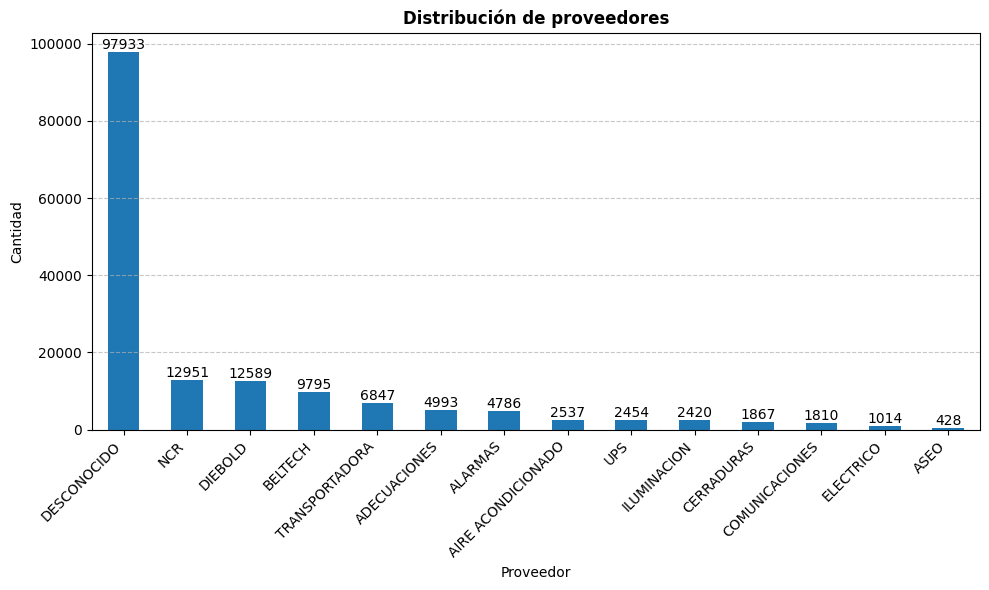

In [49]:
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
ax = df_nombre_proveedor.plot(kind='bar')

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f}'.format(y)  # Formatear el valor sin decimales
    ax.text(x, y, label, ha='center', va='bottom')

plt.title('Distribución de proveedores', fontdict={'fontweight': 'bold'})
plt.xlabel('Proveedor')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()

#### Columna MARCA_ATM

In [50]:
df_eventos_cajeros['MARCA_ATM'].value_counts()

MARCA_ATM
DIEBOLD        78437
NCR            60348
HYOSUNG        21979
BELLTECH        1520
POR DEFINIR      140
Name: count, dtype: int64

Se ha identificado que la marca de cajero automático <u>"BELLTECH"</u> es en realidad un proveedor en lugar de una marca de cajero. Por lo tanto, se procederá a reemplazar los valores correspondientes para reflejar con precisión la información correcta en el conjunto de datos.

In [51]:
# Reemplazar valores específicos en una columna
df_eventos_cajeros.replace({'MARCA_ATM': {'BELLTECH': 'POR DEFINIR'}}, inplace=True)



In [52]:
df_eventos_cajeros['MARCA_ATM'].value_counts()

MARCA_ATM
DIEBOLD        78437
NCR            60348
HYOSUNG        21979
POR DEFINIR     1660
Name: count, dtype: int64

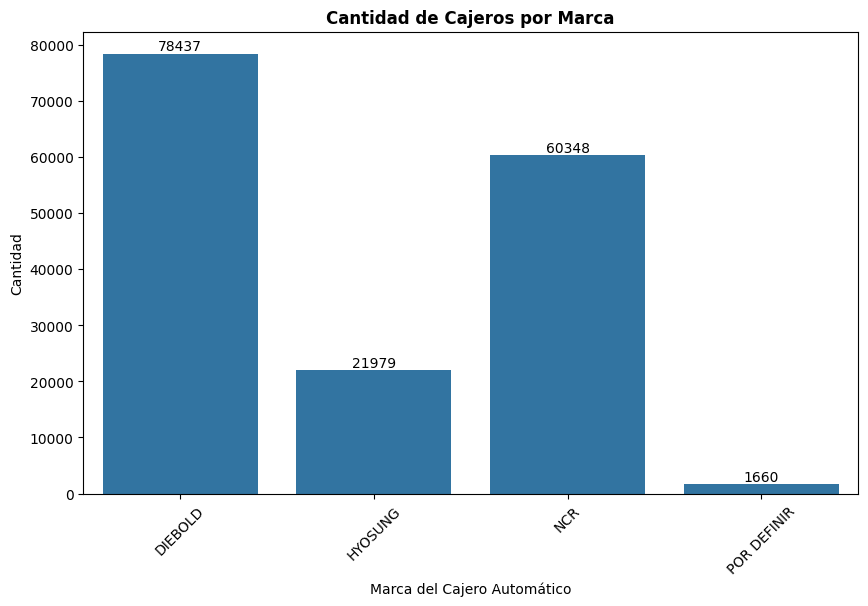

In [53]:

# Crear el gráfico de conteo con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eventos_cajeros, x='MARCA_ATM')

# Añadir etiquetas y título
plt.xlabel('Marca del Cajero Automático')
plt.ylabel('Cantidad')
plt.title('Cantidad de Cajeros por Marca', fontdict={'fontweight': 'bold'})
plt.xticks(rotation=45)

# Añadir los valores en las barras
    
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Mostrar el gráfico
plt.show()

In [54]:
# df_eventos_cajeros.to_excel("C:/Users/bladi/OneDrive/Escritorio/BOOTCAMP_DATOS/Datos/eventos_cajeros_Refinado.xlsx", index= False)
